# Segmentation Training

In [1]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Load and split preprocessed data

In [2]:
# Import dataset
data = pd.read_csv('market_processed.csv')
data.dtypes

Ever_Married                float64
Age                         float64
Graduated                   float64
Spending_Score                int64
Family_Size                 float64
Segmentation                  int64
Profession_Artist             int64
Profession_Engineer           int64
Profession_Entertainment      int64
Profession_Healthcare         int64
Profession_Lawyer             int64
Profession_Marketing          int64
dtype: object

# Dataset Summary
<p> Market Segment Of Car Company Customers </p>
<p> This dataset contains the above features for each column, The target of this dataset is to determine the Market segment of a given customer, Given by the Segmentation Column places someone in a market segment A B C or D.</p>

In [3]:
# Splitting the data set
from sklearn.model_selection import train_test_split

# Y is the dependent variable Segmentation.
# X contains the independent variables, which are all the other columns
Y = data['Segmentation']
X = data.drop('Segmentation', axis=1)

# Using a 80-20 train-test split for the training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [4]:
# Check if split was correct
print('Training data:', X_train.shape, Y_train.shape)
print('Testing data:', X_test.shape, Y_test.shape)

Training data: (5444, 11) (5444,)
Testing data: (1361, 11) (1361,)


## 2. Choose an algorithm

<p>For the classification dataset I will be choosing Logistic Regression</p>
<p> Logistic Regression is a supervised machine learning algorithm used to predict a Categorical dependent variable Y, Based on one or more dependent variables X. A logistic regression model, finds the log odds of the dependent variable y using the relationship 
log(p/(1-p)) = c + m1*x1 + ... mn*xn then the output is transformed using the sigmoid function to produce a value between 0 and 1</p>

In [9]:
# Import logistic regression and accuracy
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, roc_auc_score, confusion_matrix
from sklearn.preprocessing import label_binarize


## 3. Train and test a model

In [6]:
# initialize and train the model
logistic_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000)
logistic_model.fit(X_train, Y_train)

# Predict the test set
Y_pred = logistic_model.predict(X_test)

# show the accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy - {accuracy:.2f}")


Accuracy - 0.49


## 4. Evaluate the model 

Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.47      0.46       344
           1       0.36      0.15      0.22       312
           2       0.49      0.64      0.55       364
           3       0.57      0.65      0.61       341

    accuracy                           0.49      1361
   macro avg       0.47      0.48      0.46      1361
weighted avg       0.47      0.49      0.47      1361



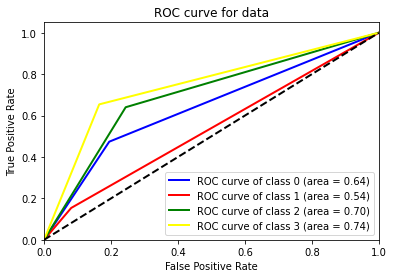

In [7]:
# Classification report
print("Classification Report:\n",classification_report(Y_test, Y_pred))


# Roc and Auc Analysis plot

# Binarize the labels
Y_bin = label_binarize(Y_test, classes=[0, 1, 2, 3]) 
Y_pred_bin = label_binarize(Y_pred, classes=[0, 1, 2, 3])

# Calculate roc curve and area
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(Y_bin[:, i], Y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


# Plot curve
for i, color in zip(range(4), ['blue', 'red', 'green', 'yellow']):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for data')
plt.legend(loc="lower right")
plt.show()

## 5. Summary

<p> In step 1 we imported the dataset, summarized its purpose in predicting the Market segment of individuals researched by a car company and then created the training and testing dataset with a split of 80 to 20</p>

<p> In step 2 we summarized the logistic regression model and its use in predicting a categorical dependent variable, using log-odds transformed by a sigmoid function and accounting for each feature and then importing the model itself along with the metrics.</p>

<p> In step 3 the model was trained, and the prediction set was created along with the accuracy being displayed</p>

<p> In step 4 the The classification report and the roc analysis plot was created</p>

# Evaluation 
<p> 

The accuracy reported for our model is about 0.49, which is better than the accuracy from random guessing, however still around 50% of the model is being misclassed.

The precision of the classification report shows for each class which were actually correct, at highest was class D at 0.57, next was class C at 0.49, class A at 0.45 and the model struggles with class B the most at a precision of 0.36

Recall tells us how many were correctly predicted out of the actual instances of a class, Class D has a recall of 0.65, Class C with 0.64, Class A with 0.47 and class B with 0.15.

f1 Score is the mean between our recall and precision, Class D is the highest with 0.61, Next is class C with 0.55, class A with 0.46 and lastly Class B is the lowest with 0.22

The roc shows the curve for True positive rate and false positive rate for each of the classes. Each class did better than the random classifier as they all had greater than 0.5 area, Class D did the best with an area of 0.74, C with 0.7, A with 0.64 and B struggling the most with 0.54.

Overall our model was better than randomly guessing but there is much room for improvement, The overall accuracy was 0.49 which was likely brought down due to the how Segmentation Class B was struggling to be identified. B was Often confused with other classes as shown by the confusion matrix.

In order to improve our accuracy further for this dataset we could possibly try different models to see if they would be able to predict better. And perhaps perform more pre-processing to ensure B was not confused with the other classes present.
</p>

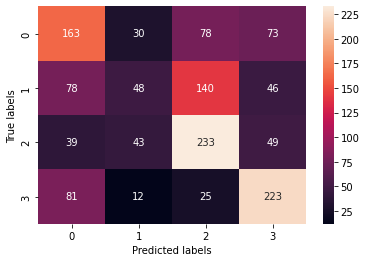

In [11]:
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()